### Outliers

- An outliers is data point that noticeably different from the rest.
- They represent errors in measurement, bad data collection.
- The data away from data point,which means data not belongs to the data set ;those point will consider as a Outliers.

###### How to findout Outliers?

- Scatterplot
- Boxplot

###### How to remove outliers?

- Z-Score
- InterQuartile Range (IQR)

### Z Score

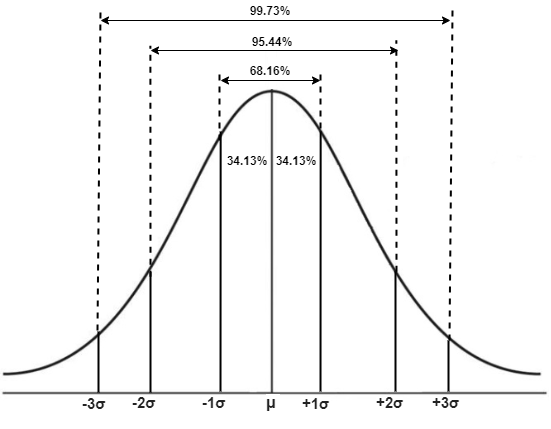

- A z-score tells us the number of standard deviations a value is from the mean of a given distribution. negative z-scores indicate the value lies below the mean. positive z-scores indicate the value lies above the mean.
- When the data lies between :
    - -1 to +1 -----> 68%
    - -2 to +2 -----> 95%
    - -3 to +3 -----> 99.7%

- An absoulte value of Z Score larger than -3 to +3 can be consider a Outliers.
- Deviation consideration based on domain knowledge.
- Formula:
    - z = (x – μ) / σ

- Where:
    - x = Data Point.
    - μ = Mean
    - σ = Std Div

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\romance.csv").dropna()

In [3]:
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross
1,tt3915174,Puss in Boots: The Last Wish,2022,PG,102 min,"Animation, Adventure, Comedy",7.9,When Puss in Boots discovers that his passion ...,"Joel Crawford, \nJanuel Mercado",/name/nm3150455/,"Antonio Banderas, \nSalma Hayek, \nHarvey Guil...","/name/nm2591093/,/name/nm0000104/,/name/nm0000...",93203.0,168464485.0
5,tt0120338,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,James Cameron,/name/nm0000116/,"Leonardo DiCaprio, \nKate Winslet, \nBilly Zan...","/name/nm0000138/,/name/nm0000701/,/name/nm0000...",1202799.0,659325379.0
11,tt9411972,Where the Crawdads Sing,2022,PG-13,125 min,"Drama, Mystery, Romance",7.2,A woman who raised herself in the marshes of t...,Olivia Newman,/name/nm3229507/,"Daisy Edgar-Jones, \nTaylor John Smith, \nHarr...","/name/nm8402992/,/name/nm4973896/,/name/nm6170...",85330.0,90230760.0
13,tt10648342,Thor: Love and Thunder,2022,PG-13,118 min,"Action, Adventure, Comedy",6.3,"Thor enlists the help of Valkyrie, Korg and ex...",Taika Waititi,/name/nm0169806/,"Chris Hemsworth, \nNatalie Portman, \nChristia...","/name/nm1165110/,/name/nm0000204/,/name/nm0000...",349821.0,343256830.0
18,tt0119217,Good Will Hunting,1997,R,126 min,"Drama, Romance",8.3,"Will Hunting, a janitor at M.I.T., has a gift ...",Gus Van Sant,/name/nm0001814/,"Robin Williams, \nMatt Damon, \nBen Affleck, \...","/name/nm0000245/,/name/nm0000354/,/name/nm0000...",987571.0,138433435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,tt10234494,Always Miss You,2019,Not Rated,98 min,Romance,3.8,Xinyi believes she's finally found a good man;...,"Hung-i Chen, \nChen Hung-i, \nHaozhou Qiu",/name/nm3056656/,"Amber Kuo, \nRyan Zheng, \nDongxue Li, \nYi-Li...","/name/nm11724856/,/name/nm10674936/,/name/nm34...",56.0,91884.0
36211,tt3362124,Love Me True,2015,Not Rated,88 min,"Comedy, Drama, Romance",5.2,Eric feels his life falling apart -- until Fyo...,Kirby Voss,/name/nm5029050/,"Andrew Gude, \nWilliam McGovern, \nKaleigh Mac...","/name/nm6151419/,/name/nm5838250/,/name/nm5068...",43.0,19887.0
37009,tt0330080,Le grand rôle,2004,Not Rated,89 min,"Comedy, Drama, Romance",5.6,"When a famous American film director, Rudolph ...",Steve Suissa,/name/nm0837661/,"Stéphane Freiss, \nBérénice Bejo, \nPeter Coyo...","/name/nm0293889/,/name/nm0067367/,/name/nm0001...",175.0,35555.0
39366,tt0015688,Classified,1925,Passed,70 min,"Comedy, Romance",6.8,"Babs Comet, is employed by the classified ad d...",Alfred Santell,/name/nm0763453/,"Corinne Griffith, \nJack Mulhall, \nWard Crane...","/name/nm0341464/,/name/nm0611804/,/name/nm0186...",18.0,245438.0


In [4]:
df.columns

Index(['movie_id', 'movie_name', 'year', 'certificate', 'runtime', 'genre',
       'rating', 'description', 'director', 'director_id', 'star', 'star_id',
       'votes', 'gross'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 1 to 44665
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     3797 non-null   object 
 1   movie_name   3797 non-null   object 
 2   year         3797 non-null   object 
 3   certificate  3797 non-null   object 
 4   runtime      3797 non-null   object 
 5   genre        3797 non-null   object 
 6   rating       3797 non-null   float64
 7   description  3797 non-null   object 
 8   director     3797 non-null   object 
 9   director_id  3797 non-null   object 
 10  star         3797 non-null   object 
 11  star_id      3797 non-null   object 
 12  votes        3797 non-null   float64
 13  gross        3797 non-null   float64
dtypes: float64(3), object(11)
memory usage: 445.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,3797.0,6.352278e+00,8.865124e-01,1.9,5.8,6.4,7.0,8.8
votes,3797.0,3.675196e+04,8.673195e+04,14.0,2591.0,8704.0,31598.0,2106826.0
gross,3797.0,1.592197e+07,3.616675e+07,85.0,242900.0,2221675.0,15240435.0,659325379.0


<Axes: >

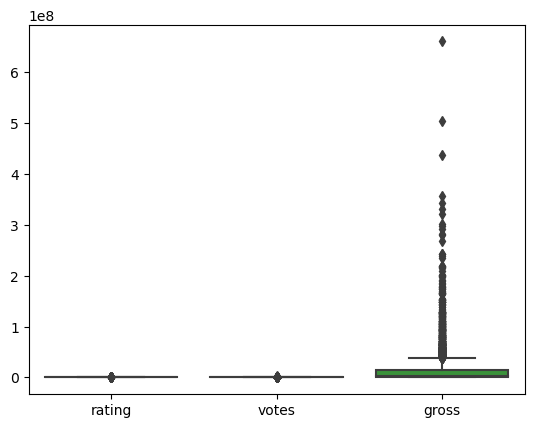

In [7]:
sns.boxplot(data=df)

In [8]:
df['gross'].unique()

array([1.68464485e+08, 6.59325379e+08, 9.02307600e+07, ...,
       3.55550000e+04, 2.45438000e+05, 1.47000000e+05])

C:\Users\tsd95\AppData\Local\Temp\ipykernel_1616\1543123923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gross'],bins=100)


<Axes: xlabel='gross', ylabel='Density'>

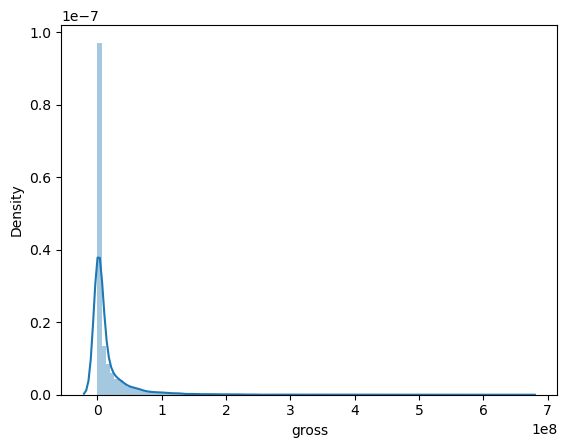

In [9]:
sns.distplot(df['gross'],bins=100)

In [10]:
up = df['gross'].mean() +3* df['gross'].std()
print(up)


lo = df['gross'].mean()-3*df['gross'].std()
print(lo)

124422211.43204263
-92578280.8953031


In [11]:
df[~((df['gross']>up)|(df['gross']<lo))]

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross
11,tt9411972,Where the Crawdads Sing,2022,PG-13,125 min,"Drama, Mystery, Romance",7.2,A woman who raised herself in the marshes of t...,Olivia Newman,/name/nm3229507/,"Daisy Edgar-Jones, \nTaylor John Smith, \nHarr...","/name/nm8402992/,/name/nm4973896/,/name/nm6170...",85330.0,90230760.0
24,tt0120783,The Parent Trap,1998,PG,128 min,"Adventure, Comedy, Drama",6.6,"Identical twins Annie and Hallie, separated at...",Nancy Meyers,/name/nm0583600/,"Lindsay Lohan, \nDennis Quaid, \nNatasha Richa...","/name/nm0517820/,/name/nm0000598/,/name/nm0001...",142598.0,66308518.0
25,tt0316396,Peter Pan,2003,PG,113 min,"Adventure, Family, Fantasy",6.8,The Darling family children receive a visit fr...,P.J. Hogan,/name/nm0389591/,"Jeremy Sumpter, \nJason Isaacs, \nOlivia Willi...","/name/nm0838911/,/name/nm0005042/,/name/nm0931...",75008.0,48462608.0
26,tt14109724,Ticket to Paradise,2022,PG-13,104 min,"Comedy, Romance",6.2,A divorced couple teams up and travels to Bali...,Ol Parker,/name/nm0662530/,"George Clooney, \nSean Lynch, \nJulia Roberts,...","/name/nm0000123/,/name/nm1116918/,/name/nm0000...",42792.0,68275985.0
29,tt3281548,Little Women,2019,PG,135 min,"Drama, Romance",7.8,"Jo March reflects back and forth on her life, ...",Greta Gerwig,/name/nm1950086/,"Saoirse Ronan, \nEmma Watson, \nFlorence Pugh,...","/name/nm1519680/,/name/nm0914612/,/name/nm6073...",213619.0,108101214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,tt10234494,Always Miss You,2019,Not Rated,98 min,Romance,3.8,Xinyi believes she's finally found a good man;...,"Hung-i Chen, \nChen Hung-i, \nHaozhou Qiu",/name/nm3056656/,"Amber Kuo, \nRyan Zheng, \nDongxue Li, \nYi-Li...","/name/nm11724856/,/name/nm10674936/,/name/nm34...",56.0,91884.0
36211,tt3362124,Love Me True,2015,Not Rated,88 min,"Comedy, Drama, Romance",5.2,Eric feels his life falling apart -- until Fyo...,Kirby Voss,/name/nm5029050/,"Andrew Gude, \nWilliam McGovern, \nKaleigh Mac...","/name/nm6151419/,/name/nm5838250/,/name/nm5068...",43.0,19887.0
37009,tt0330080,Le grand rôle,2004,Not Rated,89 min,"Comedy, Drama, Romance",5.6,"When a famous American film director, Rudolph ...",Steve Suissa,/name/nm0837661/,"Stéphane Freiss, \nBérénice Bejo, \nPeter Coyo...","/name/nm0293889/,/name/nm0067367/,/name/nm0001...",175.0,35555.0
39366,tt0015688,Classified,1925,Passed,70 min,"Comedy, Romance",6.8,"Babs Comet, is employed by the classified ad d...",Alfred Santell,/name/nm0763453/,"Corinne Griffith, \nJack Mulhall, \nWard Crane...","/name/nm0341464/,/name/nm0611804/,/name/nm0186...",18.0,245438.0


In [12]:
df['Zscore'] = (df['gross']-df['gross'].mean()) / df['gross'].std()

In [13]:
#outliers data

df[(df['Zscore']>3) |  (df['Zscore']<-3)]

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross,Zscore
1,tt3915174,Puss in Boots: The Last Wish,2022,PG,102 min,"Animation, Adventure, Comedy",7.9,When Puss in Boots discovers that his passion ...,"Joel Crawford, \nJanuel Mercado",/name/nm3150455/,"Antonio Banderas, \nSalma Hayek, \nHarvey Guil...","/name/nm2591093/,/name/nm0000104/,/name/nm0000...",93203.0,168464485.0,4.217756
5,tt0120338,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,James Cameron,/name/nm0000116/,"Leonardo DiCaprio, \nKate Winslet, \nBilly Zan...","/name/nm0000138/,/name/nm0000701/,/name/nm0000...",1202799.0,659325379.0,17.789916
13,tt10648342,Thor: Love and Thunder,2022,PG-13,118 min,"Action, Adventure, Comedy",6.3,"Thor enlists the help of Valkyrie, Korg and ex...",Taika Waititi,/name/nm0169806/,"Chris Hemsworth, \nNatalie Portman, \nChristia...","/name/nm1165110/,/name/nm0000204/,/name/nm0000...",349821.0,343256830.0,9.050713
18,tt0119217,Good Will Hunting,1997,R,126 min,"Drama, Romance",8.3,"Will Hunting, a janitor at M.I.T., has a gift ...",Gus Van Sant,/name/nm0001814/,"Robin Williams, \nMatt Damon, \nBen Affleck, \...","/name/nm0000245/,/name/nm0000354/,/name/nm0000...",987571.0,138433435.0,3.387406
19,tt0109830,Forrest Gump,1994,PG-13,142 min,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the V...",Robert Zemeckis,/name/nm0000709/,"Tom Hanks, \nRobin Wright, \nGary Sinise, \nSa...","/name/nm0000158/,/name/nm0000705/,/name/nm0000...",2106826.0,330252182.0,8.691138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,tt0290002,Meet the Fockers,2004,PG-13,115 min,"Comedy, Romance",6.3,All hell breaks loose when the Byrnes family m...,Jay Roach,/name/nm0005366/,"Ben Stiller, \nRobert De Niro, \nBlythe Danner...","/name/nm0001774/,/name/nm0000134/,/name/nm0001...",275819.0,279261160.0,7.281252
673,tt0366548,Happy Feet,2006,PG,108 min,"Animation, Adventure, Comedy",6.4,"Into the world of the Emperor Penguins, who fi...","George Miller, \nWarren Coleman, \nJudy Morris",/name/nm0004306/,"Elijah Wood, \nBrittany Murphy, \nHugh Jackman...","/name/nm0171253/,/name/nm0606688/,/name/nm0000...",190331.0,198000317.0,5.034413
716,tt0280590,Mr. Deeds,2002,PG-13,96 min,"Comedy, Romance",5.8,"A sweet-natured, small-town guy inherits a con...",Steven Brill,/name/nm0109359/,"Adam Sandler, \nWinona Ryder, \nJohn Turturro,...","/name/nm0001191/,/name/nm0000213/,/name/nm0001...",147010.0,126293452.0,3.051739
720,tt0163187,Runaway Bride,1999,PG,116 min,"Comedy, Romance",5.6,A reporter is assigned to write a story about ...,Garry Marshall,/name/nm0005190/,"Julia Roberts, \nRichard Gere, \nJoan Cusack, ...","/name/nm0000210/,/name/nm0000152/,/name/nm0000...",100561.0,152257509.0,3.769638


### Interquartile range (IQR)

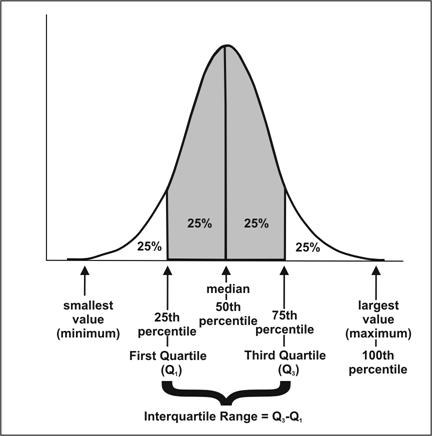 

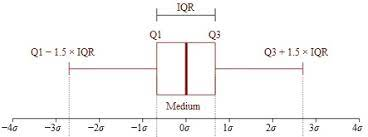

###### Percentage and Percentile

- The key difference between percentage and percentile is the percentage is a mathematical value presented out of 100 and percentile is the per cent of values below a specific value. The percentage is a means of comparing quantities. A percentile is used to display position or rank.

###### IQR

- The difference betwen  third (q3) and first (q1) quartile is known as IQR.
- Formula:
    IQR = q3-q1

In [14]:
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross,Zscore
1,tt3915174,Puss in Boots: The Last Wish,2022,PG,102 min,"Animation, Adventure, Comedy",7.9,When Puss in Boots discovers that his passion ...,"Joel Crawford, \nJanuel Mercado",/name/nm3150455/,"Antonio Banderas, \nSalma Hayek, \nHarvey Guil...","/name/nm2591093/,/name/nm0000104/,/name/nm0000...",93203.0,168464485.0,4.217756
5,tt0120338,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,James Cameron,/name/nm0000116/,"Leonardo DiCaprio, \nKate Winslet, \nBilly Zan...","/name/nm0000138/,/name/nm0000701/,/name/nm0000...",1202799.0,659325379.0,17.789916
11,tt9411972,Where the Crawdads Sing,2022,PG-13,125 min,"Drama, Mystery, Romance",7.2,A woman who raised herself in the marshes of t...,Olivia Newman,/name/nm3229507/,"Daisy Edgar-Jones, \nTaylor John Smith, \nHarr...","/name/nm8402992/,/name/nm4973896/,/name/nm6170...",85330.0,90230760.0,2.054616
13,tt10648342,Thor: Love and Thunder,2022,PG-13,118 min,"Action, Adventure, Comedy",6.3,"Thor enlists the help of Valkyrie, Korg and ex...",Taika Waititi,/name/nm0169806/,"Chris Hemsworth, \nNatalie Portman, \nChristia...","/name/nm1165110/,/name/nm0000204/,/name/nm0000...",349821.0,343256830.0,9.050713
18,tt0119217,Good Will Hunting,1997,R,126 min,"Drama, Romance",8.3,"Will Hunting, a janitor at M.I.T., has a gift ...",Gus Van Sant,/name/nm0001814/,"Robin Williams, \nMatt Damon, \nBen Affleck, \...","/name/nm0000245/,/name/nm0000354/,/name/nm0000...",987571.0,138433435.0,3.387406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,tt10234494,Always Miss You,2019,Not Rated,98 min,Romance,3.8,Xinyi believes she's finally found a good man;...,"Hung-i Chen, \nChen Hung-i, \nHaozhou Qiu",/name/nm3056656/,"Amber Kuo, \nRyan Zheng, \nDongxue Li, \nYi-Li...","/name/nm11724856/,/name/nm10674936/,/name/nm34...",56.0,91884.0,-0.437697
36211,tt3362124,Love Me True,2015,Not Rated,88 min,"Comedy, Drama, Romance",5.2,Eric feels his life falling apart -- until Fyo...,Kirby Voss,/name/nm5029050/,"Andrew Gude, \nWilliam McGovern, \nKaleigh Mac...","/name/nm6151419/,/name/nm5838250/,/name/nm5068...",43.0,19887.0,-0.439688
37009,tt0330080,Le grand rôle,2004,Not Rated,89 min,"Comedy, Drama, Romance",5.6,"When a famous American film director, Rudolph ...",Steve Suissa,/name/nm0837661/,"Stéphane Freiss, \nBérénice Bejo, \nPeter Coyo...","/name/nm0293889/,/name/nm0067367/,/name/nm0001...",175.0,35555.0,-0.439255
39366,tt0015688,Classified,1925,Passed,70 min,"Comedy, Romance",6.8,"Babs Comet, is employed by the classified ad d...",Alfred Santell,/name/nm0763453/,"Corinne Griffith, \nJack Mulhall, \nWard Crane...","/name/nm0341464/,/name/nm0611804/,/name/nm0186...",18.0,245438.0,-0.433451


<Axes: >

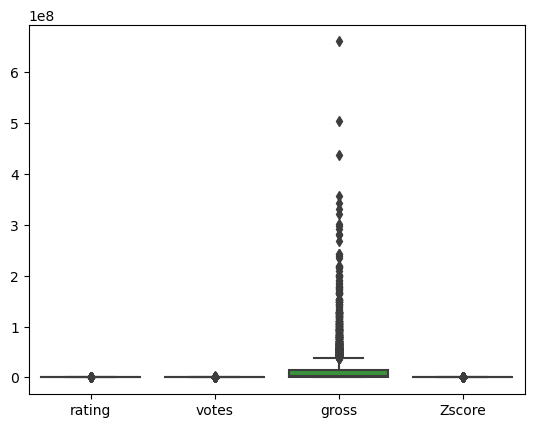

In [15]:
sns.boxplot(data=df)

In [18]:
def Outliers(df,columns,threshold=1.5):
    for col in columns :
        q1 = df['gross'].quantile(0.25)
        q3 = df['gross'].quantile(0.75)
        IQR = q3-q1
        upp = q3+threshold*IQR
        lop = q1-threshold*IQR
        df[ (df['gross']>lop)| (df['gross']<upp) ]
    return df        

In [20]:
df = Outliers(df,df['gross'])

In [21]:
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross,Zscore
1,tt3915174,Puss in Boots: The Last Wish,2022,PG,102 min,"Animation, Adventure, Comedy",7.9,When Puss in Boots discovers that his passion ...,"Joel Crawford, \nJanuel Mercado",/name/nm3150455/,"Antonio Banderas, \nSalma Hayek, \nHarvey Guil...","/name/nm2591093/,/name/nm0000104/,/name/nm0000...",93203.0,168464485.0,4.217756
5,tt0120338,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,James Cameron,/name/nm0000116/,"Leonardo DiCaprio, \nKate Winslet, \nBilly Zan...","/name/nm0000138/,/name/nm0000701/,/name/nm0000...",1202799.0,659325379.0,17.789916
11,tt9411972,Where the Crawdads Sing,2022,PG-13,125 min,"Drama, Mystery, Romance",7.2,A woman who raised herself in the marshes of t...,Olivia Newman,/name/nm3229507/,"Daisy Edgar-Jones, \nTaylor John Smith, \nHarr...","/name/nm8402992/,/name/nm4973896/,/name/nm6170...",85330.0,90230760.0,2.054616
13,tt10648342,Thor: Love and Thunder,2022,PG-13,118 min,"Action, Adventure, Comedy",6.3,"Thor enlists the help of Valkyrie, Korg and ex...",Taika Waititi,/name/nm0169806/,"Chris Hemsworth, \nNatalie Portman, \nChristia...","/name/nm1165110/,/name/nm0000204/,/name/nm0000...",349821.0,343256830.0,9.050713
18,tt0119217,Good Will Hunting,1997,R,126 min,"Drama, Romance",8.3,"Will Hunting, a janitor at M.I.T., has a gift ...",Gus Van Sant,/name/nm0001814/,"Robin Williams, \nMatt Damon, \nBen Affleck, \...","/name/nm0000245/,/name/nm0000354/,/name/nm0000...",987571.0,138433435.0,3.387406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,tt10234494,Always Miss You,2019,Not Rated,98 min,Romance,3.8,Xinyi believes she's finally found a good man;...,"Hung-i Chen, \nChen Hung-i, \nHaozhou Qiu",/name/nm3056656/,"Amber Kuo, \nRyan Zheng, \nDongxue Li, \nYi-Li...","/name/nm11724856/,/name/nm10674936/,/name/nm34...",56.0,91884.0,-0.437697
36211,tt3362124,Love Me True,2015,Not Rated,88 min,"Comedy, Drama, Romance",5.2,Eric feels his life falling apart -- until Fyo...,Kirby Voss,/name/nm5029050/,"Andrew Gude, \nWilliam McGovern, \nKaleigh Mac...","/name/nm6151419/,/name/nm5838250/,/name/nm5068...",43.0,19887.0,-0.439688
37009,tt0330080,Le grand rôle,2004,Not Rated,89 min,"Comedy, Drama, Romance",5.6,"When a famous American film director, Rudolph ...",Steve Suissa,/name/nm0837661/,"Stéphane Freiss, \nBérénice Bejo, \nPeter Coyo...","/name/nm0293889/,/name/nm0067367/,/name/nm0001...",175.0,35555.0,-0.439255
39366,tt0015688,Classified,1925,Passed,70 min,"Comedy, Romance",6.8,"Babs Comet, is employed by the classified ad d...",Alfred Santell,/name/nm0763453/,"Corinne Griffith, \nJack Mulhall, \nWard Crane...","/name/nm0341464/,/name/nm0611804/,/name/nm0186...",18.0,245438.0,-0.433451
